# Большое ДЗ №1

Выполните задания, указанные в конце ноутбука. Критерий зачета ДЗ - не менее 70% набранных баллов (балы указаны в каждом задании).

# Загрузим датасет - зарплаты IT специалистов в Европе за 2020 год

In [99]:
# Importing libaries for analysis
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", mpl.MatplotlibDeprecationWarning)
warnings.simplefilter("ignore", UserWarning)

In [100]:
path_to_data = 'https://raw.githubusercontent.com/ddvika/DS_2021/main/lecture_1/data/IT_EU_2020.csv'
df_2020 = pd.read_csv(path_to_data)
df_2020.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [101]:
df_2020.shape

(1253, 23)

In [102]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [103]:
# look at an example of a messy "numerical" columns
df_2020['Number of vacation days'].value_counts()

30                                              488
28                                              233
27                                              102
25                                               91
26                                               71
24                                               67
29                                               24
20                                               13
21                                               10
22                                                8
31                                                8
32                                                8
36                                                5
35                                                5
0                                                 4
40                                                4
23                                                4
unlimited                                         3
45                                                3
33          

In [104]:
np.unique(df_2020['Number of vacation days'].dropna())

array(['(no idea)', '0', '1', '10', '12', '14', '15', '16', '20', '21',
       '22', '23', '23+', '24', '24 labour days', '25', '26', '27', '28',
       '29', '3', '30', '30 in contract (but theoretically unlimited)',
       '31', '32', '33', '34', '35', '36', '365', '37', '37.5', '38',
       '39', '40', '45', '5', '50', '60', '99', 'Unlimited', 'Unlimited ',
       'unlimited', 'unlimited ', '~25'], dtype=object)

In [105]:
# Выведем размер датасета
df_2020.shape

(1253, 23)

In [106]:
# show all columns
print(df_2020.columns)

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [107]:
# rename columns
df_2020.rename(columns = {'Position ':'Position'}, inplace = True)

In [108]:
# Проверим NaN значения
df_2020.isna().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [109]:
df_2020.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


**Вопрос:** Почему вывелась статистика не по всем колонкам?

<!-- <a name="Признаки"></a> -->
###Признаки

In [110]:
# categorical features
features_cat = ['Gender', 'City', 'Position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Number of vacation days',
       'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

In [111]:
# numeric features
features_num = ['Age',
                'Yearly brutto salary (without bonus and stocks) in EUR',
                'Yearly bonus + stocks in EUR']

In [112]:
# features we ignore in the following
features_not_used = ['Timestamp',
                     'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
                     'Annual bonus+stocks one year ago. Only answer if staying in same country',
                     'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

In [113]:
# check if we have captured all features
len(features_cat + features_num + features_not_used) - len(df_2020.columns)

0

<a name="Очистка данных"></a>
## Очистка данных

In [114]:
# fill missing values

# categorical features
missing_text = '_MISSING_'
df_2020[features_cat] = df_2020[features_cat].fillna(missing_text)

# numerical features
missing_num = -1
df_2020[features_num] = df_2020[features_num].fillna(missing_num)

## Посмотрим простые статистики

1. Возраст людей

In [115]:
%matplotlib inline

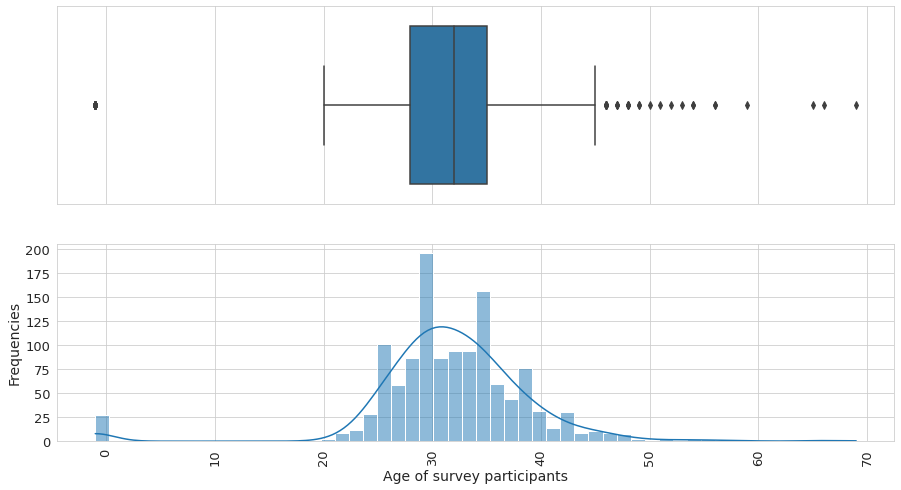

In [116]:
# Age of survey participants distribution
fig, (ax_box,ax_hist) = plt.subplots(2, sharex=True,figsize=(15,8))

sns.boxplot(data=df_2020,x='Age',ax=ax_box)
ax_box.set(xlabel="")


sns.histplot(data=df_2020,x='Age',kde=True,ax=ax_hist)
plt.xticks(fontsize=13,rotation=90)
plt.xlabel("Age of survey participants",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Frequencies",fontsize=14)
plt.show()

Используем другой тип графика

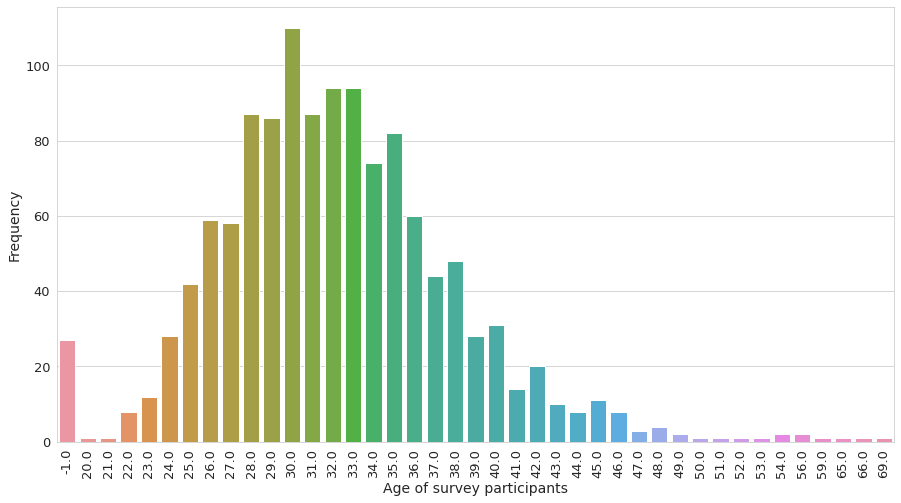

In [117]:
# count plot
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df_2020,x='Age')



plt.xticks(fontsize=13,rotation=90)
plt.xlabel("Age of survey participants",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Frequency",fontsize=14)
plt.show()

2. Посмотрим какие города встречаются в датасете

In [118]:
current_feature = 'City'
# show all levels
print(np.unique(df_2020[current_feature]))

['Aachen' 'Amsterdam' 'Ansbach' 'Barcelona' 'Basel' 'Berlin' 'Bielefeld'
 'Bodensee' 'Boeblingen' 'Bonn' 'Braunschweig ' 'Brunswick' 'Brussels'
 'Brussels ' 'Bucharest' 'Bölingen' 'Cambridge' 'City in Russia' 'Cologne'
 'Copenhagen' 'Cracovia' 'Cracow' 'Cupertino' 'Darmstadt' 'Den Haag'
 'Dortmund' 'Dresden' 'Dublin' 'Dublin ' 'Duesseldorf' 'Dusseldorf'
 'Dusseldurf' 'Düsseldorf' 'Düsseldorf ' 'Eindhoven' 'Erlangen' 'Fr'
 'France' 'Frankfurt' 'Friedrichshafen' 'Hamburg' 'Hannover' 'Heidelberg'
 'Heidelberg ' 'Heilbronn' 'Helsinki' 'Hildesheim' 'Hildesheim '
 'Ingolstadt' 'Ingolstadt ' 'Innsbruck' 'Istanbul' 'Jena' 'Karlsruhe'
 'Karlsruhe ' 'Kempten' 'Kiev' 'Koblenz' 'Konstanz' 'Konstanz area'
 'Krakow' 'Kyiv' 'Köln' 'Leipzig' 'Lisbon' 'London' 'Luttich' 'Lübeck'
 'Madrid' 'Malta' 'Mannheim' 'Mannheim ' 'Marseille' 'Milan' 'Milano'
 'Minsk' 'Moldova' 'Moscow' 'Munich' 'Murnau am Staffelsee ' 'Münster'
 'NJ, USA' 'Nuremberg' 'Nuremberg ' 'Nürnberg' 'Paderborn' 'Paris'
 'Prague' 'Prefer n

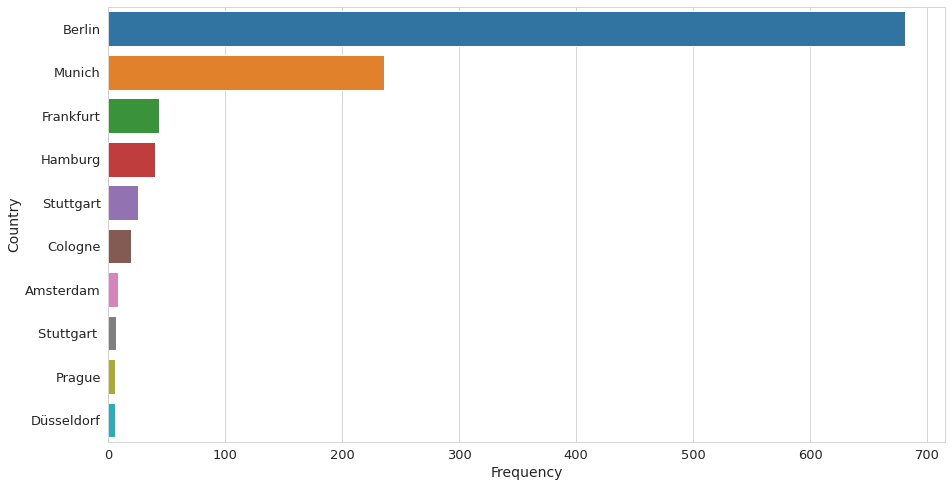

In [119]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_2020['City'].value_counts().head(10).reset_index(),
        y='index',x='City')
plt.xticks(fontsize=13)
plt.xlabel("Frequency",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Country",fontsize=14)
plt.show()

## Рассмотрим самый интересный параметр - **Yearly brutto salary (without bonus and stocks) in EUR**

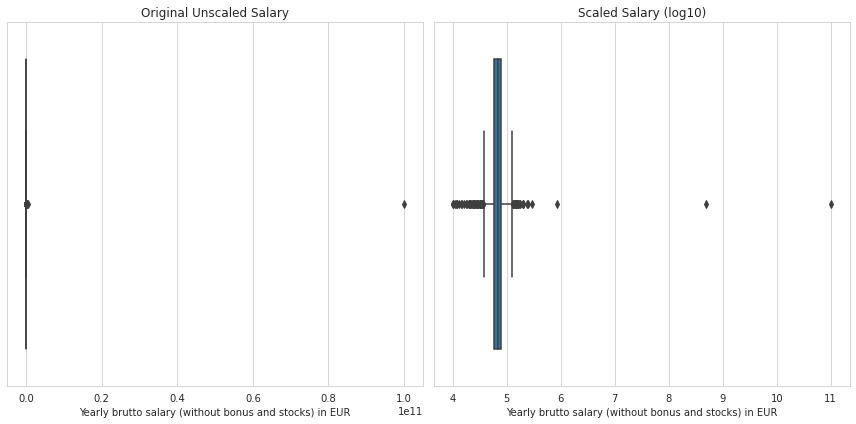

In [120]:
interested_feature = df_2020['Yearly brutto salary (without bonus and stocks) in EUR']

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))

# Original Data
plt.subplot(1,2,1)
sns.boxplot(interested_feature)
plt.title("Original Unscaled Salary")

# After Scaling down using Logarithms
plt.subplot(1,2,2)
sns.boxplot(np.log10(interested_feature))
plt.title("Scaled Salary (log10)")

plt.tight_layout()
plt.show()

**Вопрос:** Почему ничего не понятно на графиках?

In [121]:
# Removing Outlier using IQR

feature = 'Yearly brutto salary (without bonus and stocks) in EUR'

p25 = df_2020[feature].quantile(0.25) 
p75 = df_2020[feature].quantile(0.75) 
iqr = p75 - p25 

upper_limit = p75 + 1.5 * iqr 
lower_limit = p25 - 1.5 * iqr 

# New DataFrame after removing the outlier 
new_df = df_2020[(df_2020[feature] > lower_limit) & (df_2020[feature] < upper_limit)].copy()

# Checking the difference
diff = df_2020.shape[0] - new_df.shape[0] 

diff

82

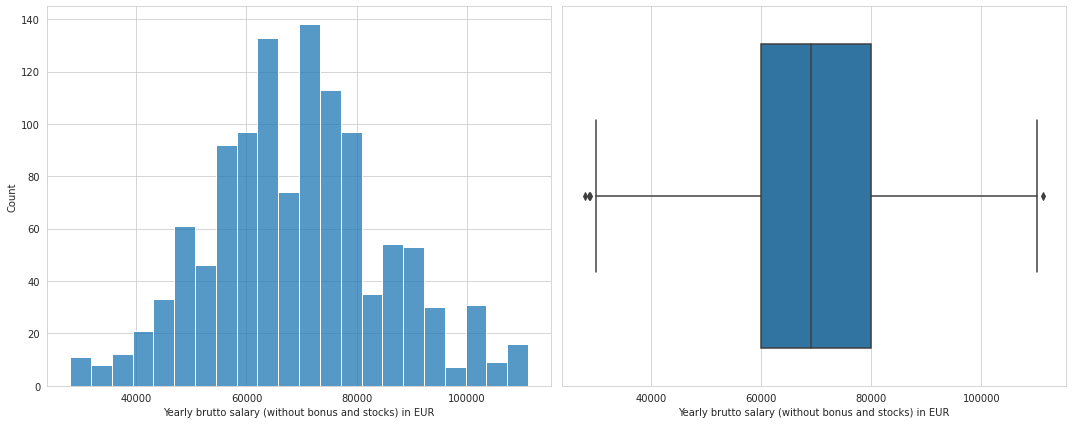

In [122]:
# Distribution after removing outlier from the dataset

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

sns.histplot(new_df[feature], ax=ax1)
sns.boxplot(new_df[feature],ax=ax2)

plt.tight_layout()
plt.show()

## Связи между фичами

In [123]:
# Exploring the Gender Column
feature = 'Gender'
new_df[feature].unique()

array(['Male', 'Female', '_MISSING_'], dtype=object)

In [124]:
# Replacing the NaN value with string "Not Specified"
new_df[feature].unique()

array(['Male', 'Female', '_MISSING_'], dtype=object)

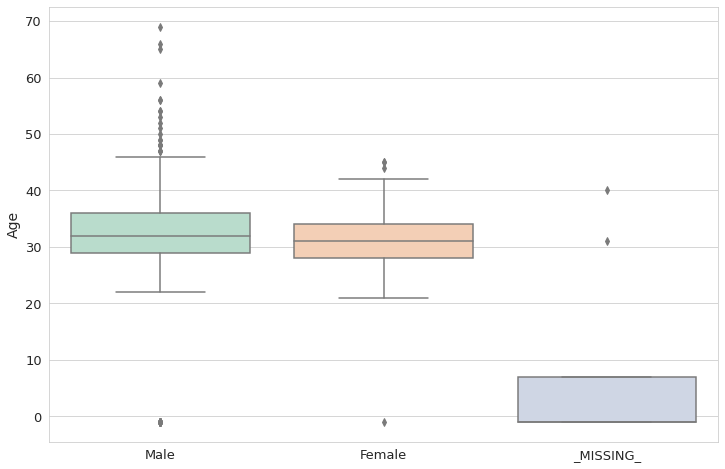

In [125]:
# Plotting the Boxplots
plt.figure(figsize=(12,8))
sns.boxplot(x='Gender',y='Age',data=new_df,palette='Pastel2')
plt.xticks(fontsize=13)
plt.xlabel("")
plt.yticks(fontsize=13)
plt.ylabel("Age",fontsize=14)
plt.show()

In [126]:
print(df_2020[df_2020.Gender == 'Male'].shape)
print(df_2020[df_2020.Gender == 'Female'].shape)

(1049, 23)
(192, 23)


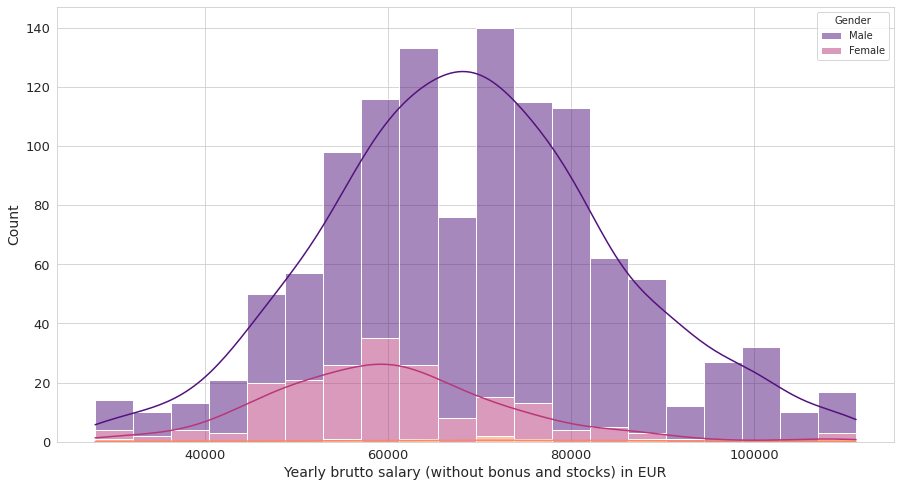

In [127]:
# Distribution of Yearly Salaries 
plt.figure(figsize=(15,8))
sns.histplot(x='Yearly brutto salary (without bonus and stocks) in EUR',data=new_df,
             bins=20, kde=True, hue='Gender',multiple="stack",palette='magma')
plt.xticks(fontsize=13)
plt.xlabel("Yearly brutto salary (without bonus and stocks) in EUR",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Count",fontsize=14)
plt.show()

## Рассмотрим должности

In [128]:
new_df['Position'].value_counts()

Software Engineer     365
Backend Developer     161
Data Scientist        102
Frontend Developer     86
QA Engineer            69
                     ... 
Marketing Analyst       1
Solution Architect      1
DatabEngineer           1
AI Management           1
Reporting Engineer      1
Name: Position, Length: 135, dtype: int64

Отобразим кол-во позиций

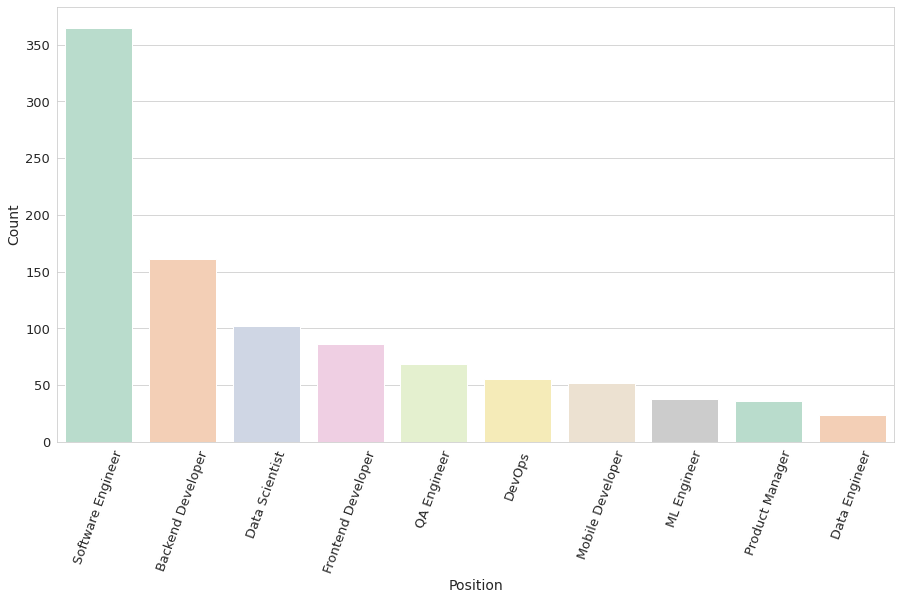

In [129]:
# Plotting the distribution - number of Positon
plt.figure(figsize=(15,8))
sns.countplot(data=new_df,x='Position',
              order=new_df['Position'].value_counts().iloc[:10].index,
              palette='Pastel2')
plt.xticks(rotation=70,fontsize=13)
plt.xlabel("Position",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Count",fontsize=14)
plt.show()

In [130]:
position_earning = new_df['Yearly brutto salary (without bonus and stocks) in EUR'].groupby(new_df['Position']).sum()
position_earning.sort_values(ascending=False,inplace=True)
position_earning.head(10)

Position
Software Engineer     26047284.0
Backend Developer     11283523.0
Data Scientist         6811400.0
Frontend Developer     5609155.0
QA Engineer            4240300.0
DevOps                 4006800.0
Mobile Developer       3512400.0
ML Engineer            2554000.0
Product Manager        2454510.0
Data Engineer          1666500.0
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64

In [131]:
top_position = position_earning.iloc[:10].index.to_list()
avr_earning = (position_earning/ new_df['Position'].value_counts()).sort_values(ascending = False)

for position in top_position:
    print(position,": ",round(avr_earning[position],2))

Software Engineer :  71362.42
Backend Developer :  70083.99
Data Scientist :  66778.43
Frontend Developer :  65222.73
QA Engineer :  61453.62
DevOps :  72850.91
Mobile Developer :  67546.15
ML Engineer :  67210.53
Product Manager :  68180.83
Data Engineer :  69437.5


# Задание 1 (1 балл)
Рассчитайте корреляцию Пирсона для каждого численного признака с целевой переменной (целевая переменная -'Yearly brutto salary (without bonus and stocks) in EUR')

Создадим копию датасета во избежание потери данных:

In [132]:
df_homework = new_df.copy()

Целевая переменная:

In [133]:
target = features_num[1]
target

'Yearly brutto salary (without bonus and stocks) in EUR'

Выше мы определили какие [признаки](#Признаки) отноcим к категориальным и какие к числовым, также выделили не используемые при анализе в данном датасете признаки.

Наши числовые признаки:

In [134]:
features_num

['Age',
 'Yearly brutto salary (without bonus and stocks) in EUR',
 'Yearly bonus + stocks in EUR']

Имеем три числовых признака, проверим их типы:

In [135]:
df_homework[features_num].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171 entries, 0 to 1252
Data columns (total 3 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Age                                                     1171 non-null   float64
 1   Yearly brutto salary (without bonus and stocks) in EUR  1171 non-null   float64
 2   Yearly bonus + stocks in EUR                            1171 non-null   object 
dtypes: float64(2), object(1)
memory usage: 76.6+ KB


Признак 'Yearly bonus + stocks in EUR' имеет не числовой тип. Найдем все не числовые значения в признаке:

In [136]:
df_homework[df_homework['Yearly bonus + stocks in EUR'].str.contains('\D', regex=True, na=False)]['Yearly bonus + stocks in EUR']

355       122.13
472     bvg only
718      depends
973     60847.32
1157    Not sure
Name: Yearly bonus + stocks in EUR, dtype: object

Значение '122.13' и '60847.32' вывелись из-за разделительной точки, оставим их без изменения и преобразуем их к нужному типу на следующем шаге.\
Значение 'bvg only' (билеты на метро) заменим на 0 как на более вероятное, т.к. билеты нельзя считать годовым дополнительным денежным вознаграждением или акциями по сути.\
Значение 'Not sure' - на 0.\
Значение 'depends' - на -1.

In [137]:
df_homework.loc[472, 'Yearly bonus + stocks in EUR'] = 0
df_homework.loc[1157, 'Yearly bonus + stocks in EUR'] = 0
df_homework.loc[718, 'Yearly bonus + stocks in EUR'] = -1

Приведем тип признака 'Yearly bonus + stocks in EUR' к числовому типу

In [138]:
df_homework['Yearly bonus + stocks in EUR'] = pd.to_numeric(df_homework['Yearly bonus + stocks in EUR'], downcast='float')

Убеждаемся, что типы приведены в соответствие:

In [139]:
df_homework[features_num].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171 entries, 0 to 1252
Data columns (total 3 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Age                                                     1171 non-null   float64
 1   Yearly brutto salary (without bonus and stocks) in EUR  1171 non-null   float64
 2   Yearly bonus + stocks in EUR                            1171 non-null   float32
dtypes: float32(1), float64(2)
memory usage: 72.0 KB


Теперь может рассчитать коффициенты корреляции по всем выбранным числовым признакам:

Коэффициенты корреляции Пирсона числовых признаков с целевой переменной составили:

In [140]:
print(df_homework[features_num].corr(method='pearson')[target].sort_values())

Yearly bonus + stocks in EUR                              0.158125
Age                                                       0.176961
Yearly brutto salary (without bonus and stocks) in EUR    1.000000
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64


### Отступление

Если к формулировке задания подходить строго, то необходимо также обработать и числовые признаки, отнесенные к не рассматриваемым.\
Посмотрим на них:

In [141]:
df_homework[features_not_used].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171 entries, 0 to 1252
Data columns (total 4 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1171 non-null   object 
 1   Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country                 832 non-null    float64
 2   Annual bonus+stocks one year ago. Only answer if staying in same country                                                 566 non-null    object 
 3   Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR  1171 non-null   ob

Признак _'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'_ имеет числовой тип, с ним можно работать.\
Признак _'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR_' был отнесен к категориальным.\
А признак _'Annual bonus+stocks one year ago. Only answer if staying in same country'_ имеет не числовой тип.\
Проверим его не числовые значения:

In [142]:
df_homework[df_homework[features_not_used[2]].str.contains('\D', regex=True, na=False)][features_not_used[2]]

472    learning budget, bvg, gym, food
Name: Annual bonus+stocks one year ago. Only answer if staying in same country, dtype: object

Заменим его на 0, затем изменим тип всего признака на числовой и проверим результат:

In [143]:
df_homework.loc[472, features_not_used[2]] = 0
df_homework[features_not_used[2]] = pd.to_numeric(df_homework[features_not_used[2]], downcast='float')
df_homework[features_not_used].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171 entries, 0 to 1252
Data columns (total 4 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1171 non-null   object 
 1   Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country                 832 non-null    float64
 2   Annual bonus+stocks one year ago. Only answer if staying in same country                                                 566 non-null    float32
 3   Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR  1171 non-null   ob

Тип преобразован, теперь рассчитаем коэффициент корреляции Пирсона данных двух признаков по отношению к целевой переменной:

In [144]:
df_homework.loc[:, [target, features_not_used[1], features_not_used[2]]].corr(method='pearson')[target]

Yearly brutto salary (without bonus and stocks) in EUR                                                      1.000000
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country    0.494505
Annual bonus+stocks one year ago. Only answer if staying in same country                                    0.194721
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64

Видна линейная зависимость текущего заработка от прошлогоднего (заработок специалистов вырос) и один существенный выброс, который будет обработан в задании 7.


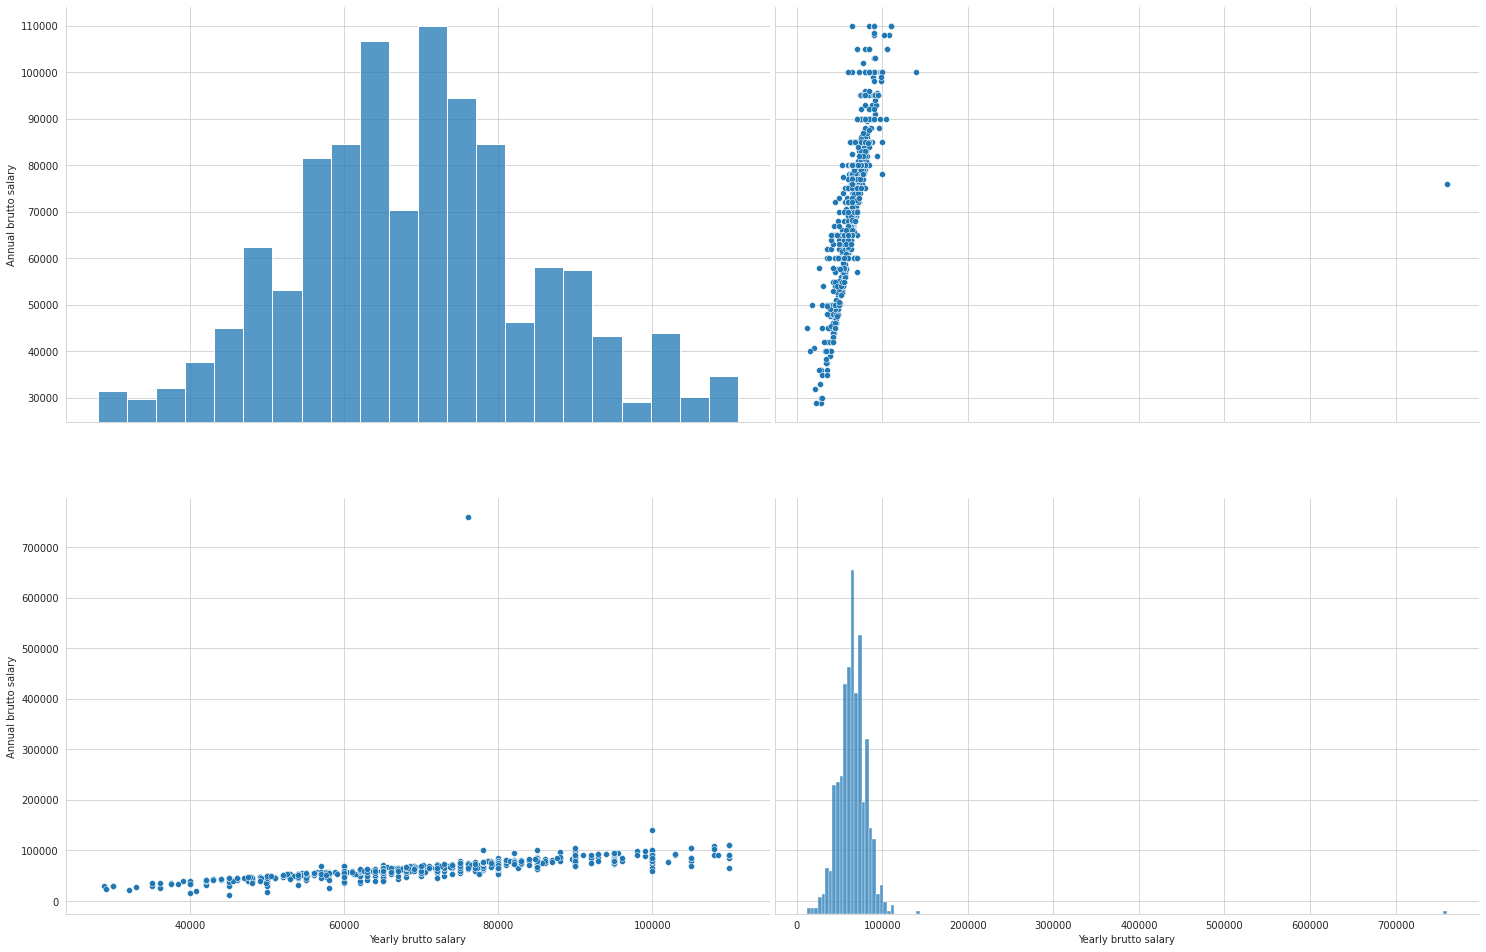

In [145]:
sns.pairplot(df_homework.loc[:, [target, features_not_used[1]]], height=7, aspect=1.5).set(xlabel='Yearly brutto salary', ylabel='Annual brutto salary')

# Задание 2 (1 балл)
Изучите данные при помощи метода ProfileReport из библиотеки pandas_profiling, установите следующие атрибуты для  ProfileReport: explorative=True, minimal=False.

Если работаете в колабе, то обязательно увыполните следующую команду (в пустой ячейке и перезапустите среду в ноутбуке ("Среда выполнения" -> "Перезапустить среду выполнения")
```
!pip3 install pandas-profiling==3.1.0
```

In [146]:
!pip3 install pandas-profiling==3.1.0

In [147]:
from pandas_profiling import ProfileReport

In [148]:
profile_final = ProfileReport(df_homework, explorative=True, minimal=False)
profile_final.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

# Задание 3 (1 балл)
Сделайте краткий вывод по данным, основываясь на отчете ProfileReport. Какие основные проблемы в данных?

Хочется отметить удобство этого инструмента для беглого и наглядного знакомства с данными (статистики, значения, корреляции). Ососбенно интересен расчет коэффициентов корреляции фи-к, который позволяет увидеть корреляции между как числовыми, так и категориальными признаками.

Общее положительное:
- отсутствуют дубликаты строк и столбцов
- 8 признаков с высокой степенью уникальности

Общее отрицательное:
- обнаружено много коррелирующих признаков (что сокращает количество уникальной информации, необходимо определить признаки-кандидаты на исключение)
- 3 признака с очень большим количеством отсутствующих значений (но эти признаки были нами исключены из рассмотрения)

Рассмотрим ProfileReport по интересующим нас признакам:

In [149]:
features_num

['Age',
 'Yearly brutto salary (without bonus and stocks) in EUR',
 'Yearly bonus + stocks in EUR']

'Age': 
- небольшое количество пропушенных значений (2%, закодировали -1), 
- имеет колоколообразную форму распределения,
- положительный эксцесс указывает на то, что у данного распределения более тяжелые хвосты по сравнению с нормальным распределением, 
- распределение не симметрично, небольшое смещение влево (левый хвост тяжелее правого)
- не очень большой коэффициент вариации говорит о том, что распределение достаточно однородно,
- небольшое отличие значений медианы и среднего характеризует распределение как близкое к нормальному

'Yearly brutto salary (without bonus and stocks) in EUR':
- выводы по предыдущему признаку применимы и к данному признаку, с тем отличием, что у него нет пропусков и его распределение более приближено к нормальному (эксцесс и смещение очень небольшие)
 
'Yearly bonus + stocks in EUR':
- очень большая доля пропущенных значений (35%, закодированы -1),
- поэтому статистики по данному признаку искажены, возможно эти случаи требуется рассмотреть отдельно и принять рещение - удалить их или же заполнить другим значением, более подходящим по смыслу (0, mean, median)

In [150]:
features_cat

['Gender',
 'City',
 'Position',
 'Total years of experience',
 'Years of experience in Germany',
 'Seniority level',
 'Your main technology / programming language',
 'Other technologies/programming languages you use often',
 'Number of vacation days',
 'Employment status',
 'Сontract duration',
 'Main language at work',
 'Company size',
 'Company type',
 'Have you lost your job due to the coronavirus outbreak?',
 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

'Gender':
- данные сильно не сбалансированы, данных по мужчинам значительно больше, чем по женщинам

'Other technologies/programming languages you use often':
- более 12% значений с пропусками (закодированы '\_MISSING\_')

По остальным признакам аномалий не обнаружено.

# Задание 4 (1 балл)
Расчитайте матрицу корреляций признаков. Используйте метод corr() из библиотеки pandas, а для визуализации - heatmap из библиотеки seaborn (см. пример в ноутбуке с занятия: https://colab.research.google.com/drive/1niWhG85phDcW3CToyT0ttWbZnnUnsbxW)

In [151]:
df_homework[features_num].corr(method='pearson')

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR
Age,1.000000,0.176961,0.025720
Yearly brutto salary (without bonus and stocks) in EUR,0.176961,1.000000,0.158125
Yearly bonus + stocks in EUR,0.025720,0.158125,1.000000


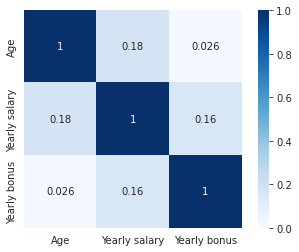

In [152]:
labels = ['Age', 'Yearly salary', 'Yearly bonus']
sns.heatmap(df_homework[features_num].corr(method='pearson'), vmin=0, vmax=1, annot=True, xticklabels=labels, yticklabels=labels, square=True, cmap='Blues')

# Задание 5 (1.5 балла)

Закодируйте категориальные признаки. Можете использовать любой кодировщик категориальных данных, например: `sklearn.preprocessing.LabelEncoder`,`sklearn.preprocessing.OrdinalEncoder` или`sklearn.preprocessing.OneHotEncoder`.

Для дальнейшей работы создадим копию датасета во избежание потери данных на этапе кодирования признаков:

In [153]:
df_features = df_homework.copy()
df_features.reset_index(inplace=True)

In [154]:
features_cat

['Gender',
 'City',
 'Position',
 'Total years of experience',
 'Years of experience in Germany',
 'Seniority level',
 'Your main technology / programming language',
 'Other technologies/programming languages you use often',
 'Number of vacation days',
 'Employment status',
 'Сontract duration',
 'Main language at work',
 'Company size',
 'Company type',
 'Have you lost your job due to the coronavirus outbreak?',
 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

Для следующих признаков применим кодирование меток с помощью метода LabelEncoder, т.к. для них нам важно сохранить отношения (одно меньше или больше другого):
- 'Total years of experience',
- 'Years of experience in Germany',
- 'Number of vacation days'

А для остальных такие отношения ложны, поэтому для следующих признаков применим пользовательское кодирование:
- 'Position',
- 'Your main technology / programming language',
- 'Other technologies/programming languages you use often'

Пользовательское кодирование для данных признаков выбрано исходя из того, что значения в них состоят из повторяющихся элементов, но в разных комбинациях. Таких элементов гораздо меньше, чем просто количество уникальных значений в признаках. Также данные элементы однозначно соответствуют каждой записи датасета и отлично отражают предметную область.

А для оставшихся - OneHot кодирование, т.к. значения в них не комбинируются.


In [155]:
features_LE = ['Total years of experience', 'Years of experience in Germany', 'Number of vacation days']
features_to_restruct = ['Position', 'Your main technology / programming language', 'Other technologies/programming languages you use often']
features_OHE = sorted(list((set(features_cat).difference(set(features_LE)).difference(set(features_to_restruct)))))

Также один из [признаков](#Признаки) исключен нами из рассмотрения:

In [156]:
features_OHE.remove('Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR')

In [157]:
features_LE

['Total years of experience',
 'Years of experience in Germany',
 'Number of vacation days']

In [158]:
features_to_restruct

['Position',
 'Your main technology / programming language',
 'Other technologies/programming languages you use often']

In [159]:
features_OHE

['City',
 'Company size',
 'Company type',
 'Employment status',
 'Gender',
 'Have you lost your job due to the coronavirus outbreak?',
 'Main language at work',
 'Seniority level',
 'Сontract duration']

Количество просто уникальных значений признаков, выбранных для пользовательского кодирования:

In [160]:
count_before = df_features.loc[:, features_to_restruct].nunique().sum()
count_before

915

Количество уникальных значений признаков, выбранных для OneHot кодирования:

In [161]:
df_features.loc[:, features_OHE].nunique().sum()

225

##LabelEncoder

In [162]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [163]:
le = LabelEncoder()
for _ in features_LE:
    df_features[_] = le.fit_transform(df_features[_])

In [164]:
df_features.loc[:, features_LE].head(3)

,Total years of experience,Years of experience in Germany,Number of vacation days
0,36,30,18
1,41,35,15
2,33,9,10


In [165]:
df_features.loc[:, features_LE].describe()

,Total years of experience,Years of experience in Germany,Number of vacation days
count,1171.000000,1171.000000,1171.000000
mean,24.740393,24.759180,16.905209
std,14.718646,13.457121,6.086167
min,0.000000,0.000000,0.000000
25%,9.000000,10.000000,14.000000
50%,28.000000,25.000000,16.000000
75%,38.000000,35.000000,18.000000
max,45.000000,47.000000,40.000000


##Пользовательское кодирование

###Очистка

In [166]:
# sorted(df_features.loc[:, features_to_restruct[0]].squeeze().unique().tolist())

Уберем лишние пробелы в началах и концах строк и переведем все выражения в нижний регистр:

In [167]:
for _ in features_to_restruct:
    print(df_features[df_features[_].str.contains('\s$', regex=True, na=False)].shape)
    print(df_features[df_features[_].str.contains('^\s', regex=True, na=False)].shape)

(19, 24)
(0, 24)
(44, 24)
(0, 24)
(4, 24)
(0, 24)


In [168]:
for _ in features_to_restruct:
    df_features[_].replace(to_replace='\s$', value='', regex=True, inplace=True)
    df_features[_].replace(to_replace='^\s', value='', regex=True, inplace=True)

In [169]:
for _ in features_to_restruct:
    df_features[_] = df_features[_].squeeze().str.lower()

Проанализировав значения, исправим основные ошибки (над универсальным и потоковым решение следует, конечно, подумать. Определенно надо учить регулярные выражения):

In [170]:
df_features['Your main technology / programming language'].replace(to_replace='kuberenetes|kubrrnetes', value='kubernetes', regex=True, inplace=True)
df_features['Your main technology / programming language'].replace(to_replace='pyrhon|pythin', value='python', regex=True, inplace=True)
df_features['Your main technology / programming language'].replace(to_replace='c# .net', value='c#/net', regex=True, inplace=True)
df_features['Your main technology / programming language'].replace(to_replace='python + sql', value='python,sql', regex=True, inplace=True)
df_features['Your main technology / programming language'].replace(to_replace='js', value='javascript', regex=True, inplace=True)
df_features['Your main technology / programming language'].replace(to_replace='node', value='node.js', regex=True, inplace=True)
df_features['Your main technology / programming language'].replace(to_replace='node.js.javascript|node.jsjavascript|node.jsjavascript, typescript, aws|node.jsjavascript/ts|nodsjavascript', value='node.js', regex=True, inplace=True)
df_features['Your main technology / programming language'].replace(to_replace='с#', value='c#', regex=True, inplace=True)
df_features['Your main technology / programming language'].replace(to_replace='офмф', value='java', regex=True, inplace=True)
df_features['Your main technology / programming language'].replace(to_replace='c#/.net|c#/net', value='c#,.net', regex=True, inplace=True)
df_features['Your main technology / programming language'].replace(to_replace='c\+\+', value='c-plus-plus', regex=True, inplace=True)
df_features['Your main technology / programming language'].replace(to_replace='c\+', value='c-plus', regex=True, inplace=True)

In [171]:
df_features['Your main technology / programming language'].replace(to_replace='\s\/\s|,\s|\/|\/\s|\s\/', value=',', regex=True, inplace=True)

In [172]:
df_features['Your main technology / programming language'].replace(to_replace='frontend: react,node.js', value='frontend react,node.js', regex=False, inplace=True)

In [173]:
df_features['Your main technology / programming language'].replace(to_replace='linux,unix,git,virtualisation platforms,*shell(s) scripts', value='linux,unix,git,virtualisation platforms,shell(s) scripts', regex=False, inplace=True)

In [174]:
df_features['Your main technology / programming language'].replace(to_replace='c\#', value='c-sharp', regex=True, inplace=True)
df_features['Your main technology / programming language'].replace(to_replace='\.|\(|\)', value='', regex=True, inplace=True)
df_features['Your main technology / programming language'].replace(to_replace='\s\+\s', value=' ', regex=True, inplace=True)

In [175]:
df_features['Other technologies/programming languages you use often'].replace(to_replace=' / |, |/|\/\s| /', value=',', regex=True, inplace=True)
df_features['Other technologies/programming languages you use often'].replace(to_replace='nodejs', value='node.js', regex=True, inplace=True)
df_features['Other technologies/programming languages you use often'].replace(to_replace='c\+\+', value='c-plus-plus', regex=True, inplace=True)
df_features['Other technologies/programming languages you use often'].replace(to_replace='c\+', value='c-plus', regex=True, inplace=True)

In [176]:
df_features['Other technologies/programming languages you use often'].replace(to_replace='c\#', value='c-sharp', regex=True, inplace=True)
df_features['Other technologies/programming languages you use often'].replace(to_replace='\.|\(|\)', value='', regex=True, inplace=True)
df_features['Other technologies/programming languages you use often'].replace(to_replace='\s\+\s', value=' ', regex=True, inplace=True)

In [177]:
df_features['Position'].replace(to_replace='dana', value='data', regex=True, inplace=True)
df_features['Position'].replace(to_replace='full-stack', value='fullstack', regex=True, inplace=True)
df_features['Position'].replace(to_replace='architekt', value='architect', regex=True, inplace=True)
df_features['Position'].replace(to_replace='teamlead', value='team lead', regex=True, inplace=True)
df_features['Position'].replace(to_replace='testmanager', value='test manager', regex=True, inplace=True)
df_features['Position'].replace(to_replace='databengineer', value='data engineer', regex=True, inplace=True)
df_features['Position'].replace(to_replace='solutions architect', value='solution architect', regex=True, inplace=True)
df_features['Position'].replace(to_replace='technical lead', value='tech lead', regex=True, inplace=True)
df_features['Position'].replace(to_replace='systemadministrator', value='system administrator', regex=True, inplace=True)
df_features['Position'].replace(to_replace='c\+\+', value='c-plus-plus', regex=True, inplace=True)
df_features['Position'].replace(to_replace='c\+', value='c-plus', regex=True, inplace=True)

In [178]:
df_features['Position'].replace(to_replace='\s\/\s|,\s|\/|\/\s|\s\/', value=',', regex=True, inplace=True)

In [179]:
df_features['Position'].replace(to_replace='designer (ui,ux)', value='designer ui-ux', regex=False, inplace=True)

In [180]:
df_features['Position'].replace(to_replace='\/\s', value=',', regex=True, inplace=True)

In [181]:
df_features['Position'].replace(to_replace='\.|\(|\)', value='', regex=True, inplace=True)

Таким образом сократили количество новых признаков:

In [182]:
count_after = df_features.loc[:, features_to_restruct].nunique().sum()
print(f'До: {count_before}, после: {count_after}')

До: 915, после: 828


Далее приступим к выделению уже уникальных элементов и сокращению признаков:

In [183]:
unique_elements_ftr0 = df_features[features_to_restruct[0]].unique().tolist()
unique_elements_ftr12 = df_features[features_to_restruct[1]].unique().tolist()
unique_elements_ftr12.extend(df_features[features_to_restruct[2]].unique().tolist())

In [184]:
l = []
for _ in unique_elements_ftr0:
    l.extend(_.split(','))
list_ue_ftr0 = sorted(list(set(l)))

In [185]:
l = []
for _ in unique_elements_ftr12:
    l.extend(_.split(','))
list_ue_ftr12 = sorted(list(set(l)))

In [186]:
l = ['ну или software engineer', '_missing_']
for _ in l:
    list_ue_ftr0.remove(_)
l = ['-', '--', 'none', 'nothing', '', '_missing_']
for _ in l:
    list_ue_ftr12.remove(_)

Таким образом сократили количество новых признаков:

In [187]:
count_after = len(list_ue_ftr0) + len(list_ue_ftr12)
print(f'До: {count_before}, после: {count_after}')

До: 915, после: 304


###Кодирование

In [188]:
new_cols = sorted(list_ue_ftr0+list_ue_ftr12)

In [189]:
df_add = pd.DataFrame(data=np.zeros(shape=(df_features.shape[0], count_after)), dtype=np.int16)

In [190]:
df_add.columns = new_cols

In [191]:
for _ in list_ue_ftr0:
    t1 = r'\b(' + _ + r')\b'
    t2 = r'^(' + _ + r')&'
    t3 = r',(' + _ + r')\b'
    # print(_, '  --->  ', t1, t2, t3)
    # print(np.where(df_features.loc[:, features_to_restruct[0]].squeeze().str.contains(f'{t1}|{t2}|{t3}', regex=True), 1, 0).sum())
    df_add[_] = np.where(df_features.loc[:, features_to_restruct[0]].squeeze().str.contains(f'{t1}|{t2}|{t3}', regex=True), 1, 0)

In [192]:
for _ in list_ue_ftr12:
    t1 = r'\b(' + _ + r')\b'
    t2 = r'^(' + _ + r')&'
    t3 = r',(' + _ + r')\b'
    # print(_, '  --->  ', t1, t2, t3)
    # print(np.where((df_features.loc[:, features_to_restruct[1]] + ',' + df_features.loc[:, features_to_restruct[2]]).squeeze().str.contains(f'{t1}|{t2}|{t3}', regex=True), 1, 0).sum())
    df_add[_] = np.where((df_features.loc[:, features_to_restruct[1]] + ',' + df_features.loc[:, features_to_restruct[2]]).squeeze().str.contains(f'{t1}|{t2}|{t3}', regex=True), 1, 0)

In [193]:
df_add.head()

,consumer insights analyst,data engineer,network security,3ds max,abap,account managet,adobe cloud,agile,agile coach,agile master,ai,ai management,airflow,alteryx,analyst,analytics engineer,android,angular,angular2+,ansible,apache hadoop,apache hive,apache impala,apache spark,apex,apotheker,application consultant,architect,atlassian jira,automation,aws,aws hadoop postgre typescript,azure,backend developer,banker,bash,beikoch,bi,bi analyst,bi consultant,...,statistics,student,stuttgart,support engineer,sw architect,swift,system administrator,t-sql,tableau,tailwindcss,team lead,team manager,tech lead,tech recruiting,technical account manager,technical business analyst,technical project manager,tensorflow,terraform,test management,test manager,testautomation,tricentis tosca,ts,typescript,uml,unix,unix shell scripts,vb,vba,vbnet,vhdl,virtualisation platforms,vms,vp engineering,wdio,web,web apps,whole apache data science stack,yaml
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Проверим корректность:

In [194]:
for _ in np.random.randint(0, df_features.shape[0], 3):
    print(df_add.iloc[_, :][df_add.iloc[_, :] == 1], df_features.loc[_, features_to_restruct], sep='\n\n')
    print('\n=====================\n')

ansible        1
docker         1
kubernetes     1
python         1
qa engineer    1
Name: 184, dtype: int64

Position                                                                       qa engineer
Your main technology / programming language                                         python
Other technologies/programming languages you use often    python,kubernetes,docker,ansible
Name: 184, dtype: object


data scientist    1
python            1
sql               1
Name: 889, dtype: int64

Position                                                  data scientist
Your main technology / programming language                       python
Other technologies/programming languages you use often               sql
Name: 889, dtype: object


aws                  1
backend developer    1
docker               1
java                 1
javascript           1
scala                1
sql                  1
typescript           1
Name: 234, dtype: int64

Position                                          

Добавим новые признаки в датасет:

In [195]:
df_features = df_features.join(df_add, how='left')

In [196]:
df_features.head()

,index,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR",consumer insights analyst,data engineer,network security,3ds max,abap,account managet,adobe cloud,agile,agile coach,agile master,ai,ai management,airflow,alteryx,analyst,analytics engineer,...,statistics,student,stuttgart,support engineer,sw architect,swift,system administrator,t-sql,tableau,tailwindcss,team lead,team manager,tech lead,tech recruiting,technical account manager,technical business analyst,technical project manager,tensorflow,terraform,test management,test manager,testautomation,tricentis tosca,ts,typescript,uml,unix,unix shell scripts,vb,vba,vbnet,vhdl,virtualisation platforms,vms,vp engineering,wdio,web,web apps,whole apache data science stack,yaml
0,0,24/11/2020 11:14:15,26.0,Male,Munich,software engineer,36,30,Senior,typescript,"kotlin,javascript,typescript",80000.0,5000.0,75000.0,10000.0,18,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,_MISSING_,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,24/11/2020 11:14:16,26.0,Male,Berlin,backend developer,41,35,Senior,ruby,_missing_,80000.0,-1.0,82000.0,5000.0,15,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,_MISSING_,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,24/11/2020 11:15:24,28.0,Male,Berlin,frontend developer,33,9,Junior,javascript,_missing_,54000.0,-1.0,NaN,NaN,10,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,_MISSING_,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,24/11/2020 11:15:46,37.0,Male,Berlin,backend developer,13,40,Senior,"c-sharp,net","net,sql,aws,docker",62000.0,-1.0,62000.0,NaN,16,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,_MISSING_,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,24/11/2020 11:15:53,32.0,Male,Berlin,devops,36,9,Senior,"aws,gcp,python,k8s","python,aws,google cloud,kubernetes,docker",76000.0,5000.0,76000.0,5000.0,18,Full-time employee,Unlimited contract,English,11-50,Startup,No,NaN,_MISSING_,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##OneHotEncoder

###Очистка

In [197]:
for _ in features_OHE:
    df_features[_] = df_features[_].squeeze().str.lower()

In [198]:
for _ in features_OHE:
    df_features[_].replace(to_replace='\s$', value='', regex=True, inplace=True)
    df_features[_].replace(to_replace='^\s', value='', regex=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [199]:
df_features['City'].replace(to_replace='^fr$', value='france', regex=True, inplace=True)
df_features['City'].replace(to_replace='^milano$', value='milan', regex=True, inplace=True)
df_features['City'].replace(to_replace=',\spoland', value='', regex=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [200]:
df_features['Company type'].replace(to_replace='financial', value='finance', regex=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [201]:
df_features['Main language at work'].replace(to_replace='русский', value='russian', regex=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [202]:
df_features = df_features.join(pd.get_dummies(df_features.loc[:, features_OHE]), how='left')

In [203]:
df_features.shape

(1171, 549)

In [204]:
df_features.drop(columns=features_not_used, inplace=True)
df_features.drop(columns=features_to_restruct, inplace=True)
df_features.drop(columns=features_OHE, inplace=True)
df_features.drop(columns='index', inplace=True)

In [205]:
df_features.head()

,Age,Total years of experience,Years of experience in Germany,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week",consumer insights analyst,data engineer,network security,3ds max,abap,account managet,adobe cloud,agile,agile coach,agile master,ai,ai management,airflow,alteryx,analyst,analytics engineer,android,angular,angular2+,ansible,apache hadoop,apache hive,apache impala,apache spark,apex,apotheker,application consultant,architect,atlassian jira,automation,aws,aws hadoop postgre typescript,azure,...,Have you lost your job due to the coronavirus outbreak?_kurzarbeitzeit for 1.5 months,Have you lost your job due to the coronavirus outbreak?_leads and project inquiries have slowed down,Have you lost your job due to the coronavirus outbreak?_lost the job but for different reason,Have you lost your job due to the coronavirus outbreak?_no,"Have you lost your job due to the coronavirus outbreak?_no, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months",Have you lost your job due to the coronavirus outbreak?_yes,Have you lost your job due to the coronavirus outbreak?_yes but found a new one with better pay / perks,Main language at work_50/50,Main language at work__missing_,Main language at work_both,Main language at work_czech,Main language at work_english,Main language at work_english and german,Main language at work_french,Main language at work_german,Main language at work_italian,Main language at work_russian,"Main language at work_russian, english",Main language at work_spanish,Main language at work_русский,Seniority level__missing_,Seniority level_director,Seniority level_entry level,Seniority level_head,Seniority level_intern,Seniority level_junior,Seniority level_key,Seniority level_lead,Seniority level_manager,Seniority level_middle,"Seniority level_no idea, there are no ranges in the firm",Seniority level_no level,Seniority level_no level,Seniority level_principal,Seniority level_senior,Seniority level_vp,Seniority level_work center manager,Сontract duration__missing_,Сontract duration_temporary contract,Сontract duration_unlimited contract
0,26.0,36,30,80000.0,5000.0,18,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,26.0,41,35,80000.0,-1.0,15,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,28.0,33,9,54000.0,-1.0,10,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,37.0,13,40,62000.0,-1.0,16,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,32.0,36,9,76000.0,5000.0,18,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [206]:
df_features.shape

(1171, 532)

# Задание 6 (1.5 балла)
После кодирования категориальных признаков в числовые - еще раз рассчитайте и отобразите матрицу корреляций. Удалите фичи, у которых корреляция >0.6 или (<-0.6). Не забывайте что отрицательная корреляция - тоже мера зависимости!

In [207]:
df_features.corr()

,Age,Total years of experience,Years of experience in Germany,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week",consumer insights analyst,data engineer,network security,3ds max,abap,account managet,adobe cloud,agile,agile coach,agile master,ai,ai management,airflow,alteryx,analyst,analytics engineer,android,angular,angular2+,ansible,apache hadoop,apache hive,apache impala,apache spark,apex,apotheker,application consultant,architect,atlassian jira,automation,aws,aws hadoop postgre typescript,azure,...,Have you lost your job due to the coronavirus outbreak?_kurzarbeitzeit for 1.5 months,Have you lost your job due to the coronavirus outbreak?_leads and project inquiries have slowed down,Have you lost your job due to the coronavirus outbreak?_lost the job but for different reason,Have you lost your job due to the coronavirus outbreak?_no,"Have you lost your job due to the coronavirus outbreak?_no, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months",Have you lost your job due to the coronavirus outbreak?_yes,Have you lost your job due to the coronavirus outbreak?_yes but found a new one with better pay / perks,Main language at work_50/50,Main language at work__missing_,Main language at work_both,Main language at work_czech,Main language at work_english,Main language at work_english and german,Main language at work_french,Main language at work_german,Main language at work_italian,Main language at work_russian,"Main language at work_russian, english",Main language at work_spanish,Main language at work_русский,Seniority level__missing_,Seniority level_director,Seniority level_entry level,Seniority level_head,Seniority level_intern,Seniority level_junior,Seniority level_key,Seniority level_lead,Seniority level_manager,Seniority level_middle,"Seniority level_no idea, there are no ranges in the firm",Seniority level_no level,Seniority level_no level,Seniority level_principal,Seniority level_senior,Seniority level_vp,Seniority level_work center manager,Сontract duration__missing_,Сontract duration_temporary contract,Сontract duration_unlimited contract
Age,1.000000,-0.247567,0.109262,0.176961,0.025720,-0.010611,-0.013880,0.004463,-0.017373,0.063721,-0.003438,0.056155,-0.019240,-0.003438,0.055820,0.055820,-0.003438,-0.027141,-0.011339,0.000513,-0.007388,-0.011654,-0.003438,0.007898,-0.002547,0.032117,-0.026662,-0.007388,-0.007388,-0.007388,-0.035636,0.004463,0.012364,0.012364,0.044267,0.079523,0.045440,-0.011051,0.000513,0.026637,...,0.055820,-0.007388,0.036067,0.023219,0.004463,0.026924,0.004463,-0.023190,-0.126998,-0.007388,0.000513,-0.085204,0.011904,0.008414,0.123378,0.017493,0.025312,-0.023190,0.016868,-0.031091,-0.121506,0.004463,-0.035042,0.107441,-0.038992,-0.108990,-0.015289,0.109666,0.016315,-0.192420,0.059771,0.000513,0.040018,0.021434,0.135075,0.032117,0.024216,-0.109762,-0.030111,0.089087
Total years of experience,-0.247567,1.000000,-0.030448,-0.129510,0.004464,-0.062445,0.001892,-0.037239,0.038786,0.040258,-0.035252,-0.024063,0.026348,-0.035252,-0.033265,0.016413,-0.029291,-0.045188,0.026348,-0.037239,0.032310,0.000824,0.026348,-0.003409,0.019597,0.036284,0.032868,0.006477,0.006477,0.006477,0.028452,-0.037239,-0.045188,-0.041214,-0.031165,0.040258,0.013381,-0.018064,-0.017368,-0.046715,...,0.016413,0.036284,-0.033265,0.008897,-0.037239,-0.024674,0.006477,0.022374,0.065577,0.036284,0.036284,0.048187,-0.003487,-0.035252,-0.078114,0.006353,-0.006915,0.016413,0.012377,0.006477,0.042635,-0.037239,0.016413,-0.045307,-0.017368,-0.174526,0.016413,-0.149365,-0.033265,0.212003,-0.003458,0.036284,-0.033265,-0.055370,0.004189,-0.037239,0.026348,0.056308,0.008359,-0.039835
Years of experience in Germany,0.109262,-0.030448,1.000000,0.251133,0.060701,0.083822,0.103200,-0.027731,0.037328,-0.010344,-0.003823,-0.049312,-0.034251,-0.003823,0.039645,-0.027731

In [208]:
def remove_collinear_features(data, threshold, target):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    y = data[target]
    data = data.drop(columns = [target])
    
    # Calculate the correlation matrix
    corr_matrix = data.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    data = data.drop(columns = drops)
            
    # Add the score back in to the data
    data[target] = y
               
    return data, drops

Датасет после удаления коррелированных признаков:

In [209]:
df_features, drops = remove_collinear_features(data=df_features, threshold=0.6, target=target)

In [210]:
df_features.shape

(1171, 397)

Удаленные признаки:

In [211]:
drops

{'City_bielefeld',
 'City_bodensee',
 'City_braunschweig ',
 'City_brussels',
 'City_city in russia',
 'City_cracow',
 'City_eindhoven',
 'City_heilbronn',
 'City_ingolstadt',
 'City_koblenz',
 'City_kyiv',
 'City_mannheim ',
 'City_milan',
 'City_milano',
 'City_murnau am staffelsee ',
 'City_nj, usa',
 'City_rosenheim',
 'City_saarbrücken',
 'City_vienna',
 'City_wroclaw',
 'City_zürich',
 'Company type__missing_',
 'Company type_automotive',
 'Company type_biergarten ',
 'Company type_bloody enterprise',
 'Company type_construction',
 'Company type_consulting and product',
 'Company type_ecommerce',
 'Company type_education',
 'Company type_enterprise',
 'Company type_financial ',
 'Company type_full-time position in education, part-time position in at a data startup',
 'Company type_handel ',
 'Company type_industry',
 'Company type_institute',
 'Company type_it department of established business',
 'Company type_market research ',
 'Company type_media',
 'Company type_multinationa

# Задание 7 (1.5 балла)
Приведите пример распределения признака с выбросами (можете привести любой из выборки, кроме указанного выше в ноутбуке). Удалите выбросы с использованием правила "68-95-99.7", то есть оставьте те значения, которые попадают в диапазон: среднее значение +- 3 стандартных отклонения. Пример реализации можно посмотреть в ноутбуке с занятия: https://colab.research.google.com/drive/1niWhG85phDcW3CToyT0ttWbZnnUnsbxW. Не перепутайте с примером интерквартильного размаха!

In [212]:
feature_for_outlier = 'Number of vacation days'
factor = 3
upper_lim = df_features[feature_for_outlier].mean() + df_features[feature_for_outlier].std() * factor
lower_lim = df_features[feature_for_outlier].mean() - df_features[feature_for_outlier].std() * factor
df_features_for_outlier = df_features[(df_features[feature_for_outlier] < upper_lim) & (df_features[feature_for_outlier] > lower_lim)]

In [213]:
df_features.shape

(1171, 397)

In [214]:
df_features_for_outlier.shape

(1104, 397)

Проиллюстрируем, что выбросы удалены:

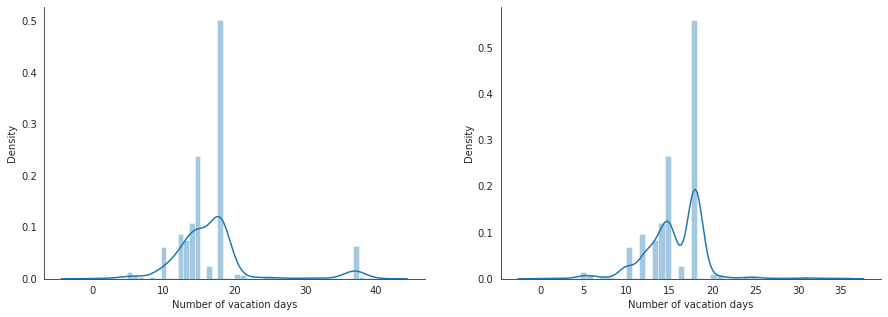

In [215]:
sns.set_style(style='white')
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df_features[feature_for_outlier], ax=ax[0])
sns.distplot(df_features_for_outlier[feature_for_outlier], ax=ax[1])
sns.despine()

Также рассмотрим признак 'Yearly bonus + stocks in EUR', в которым имеется один существенный выброс:

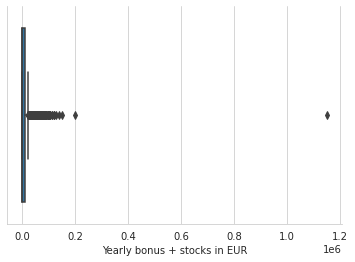

In [216]:
sns.set_style(style='whitegrid')
sns.boxplot(df_features['Yearly bonus + stocks in EUR'])
sns.despine()

Найдем его:

In [217]:
df_features.query("`Yearly bonus + stocks in EUR` > 120000").sort_values(by='Yearly bonus + stocks in EUR', ascending=False)['Yearly bonus + stocks in EUR']

530    1150000.0
699     200000.0
686     150000.0
226     140000.0
988     125000.0
Name: Yearly bonus + stocks in EUR, dtype: float32

Удалим его и проверим:

In [218]:
row_to_remove = df_features.query("`Yearly bonus + stocks in EUR` > 200000").sort_values(by=feature_for_outlier, ascending=False).index[0]

In [219]:
df_features.drop(index=row_to_remove, inplace=True)

In [220]:
df_features.query("`Yearly bonus + stocks in EUR` > 120000").sort_values(by='Yearly bonus + stocks in EUR', ascending=False)['Yearly bonus + stocks in EUR']

699    200000.0
686    150000.0
226    140000.0
988    125000.0
Name: Yearly bonus + stocks in EUR, dtype: float32

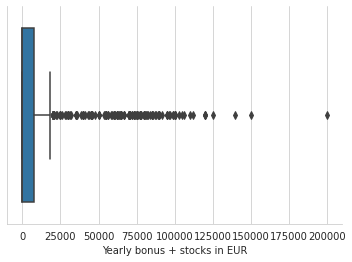

In [221]:
sns.set_style(style='whitegrid')
sns.boxplot(df_features['Yearly bonus + stocks in EUR'])
sns.despine()

# Задание 8 (1 балл)
Постройте несколько distplot (с использованием seaborn) для 3ех произвольных числовых признаков.

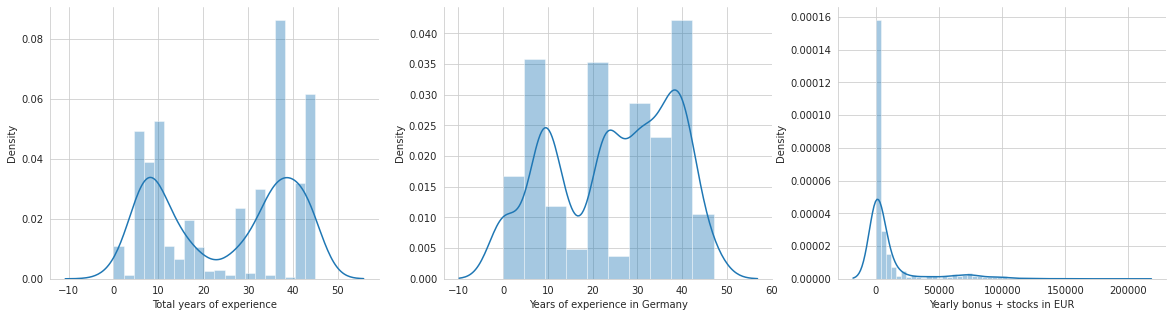

In [222]:
sns.set_style(style='whitegrid')
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.distplot(df_features['Total years of experience'], ax=ax[0], bins=20)
sns.distplot(df_features['Years of experience in Germany'], ax=ax[1])
sns.distplot(df_features['Yearly bonus + stocks in EUR'], ax=ax[2])
sns.despine()

# Задание 9 (1.5 балла)
Проведите bivariate analysis: постройте scatter plots различных фичей ( а также фичей с целей переменной). Видите ли вы какие-то зависимости? Может есть гипотезы? Постройте не менее 3ех графиков + краткие выводы по каждому.

Рассмотрим зависимости интервальных признаков и целевой переменной в итоговом датасете.\
Визуально зависимости видны только по двум признакам:
- 'Yearly bonus + stocks in EUR' (линейная прямая)
- 'Age' (прямая в целом)

Любопытно, что в признаке 'Age' при значении > 40 наблюдения расходятся условно на три ветви: средняя, возрастяющая и нисходящая.

Также была создана маска по признаку 'Seniority level_lead', чтобы посмотреть распредление данного признака на построенных графиках:



In [223]:
f_to_mask = 'Seniority level_lead'
f_mask = np.where(df_features[f_to_mask] == 1, f'{f_to_mask} = YES', f'{f_to_mask} = NO')

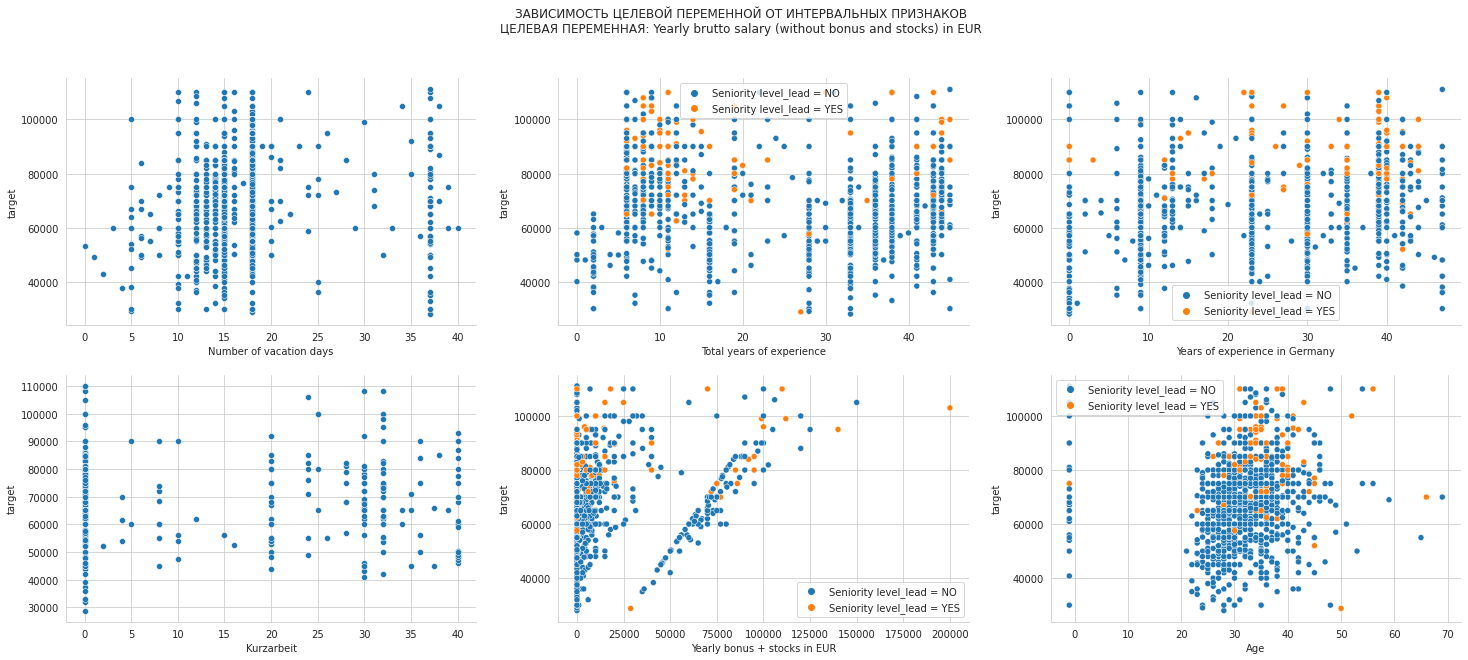

In [224]:
sns.set_style(style='whitegrid')
fig, ax = plt.subplots(2, 3, figsize=(25, 10))
fig.suptitle(str.upper('Зависимость целевой переменной от интервальных признаков') + '\n' + f'ЦЕЛЕВАЯ ПЕРЕМЕННАЯ: {target}')
sns.scatterplot(x=df_features['Number of vacation days'], y=df_features[target], ax=ax[0, 0]).set(ylabel='target')
sns.scatterplot(x=df_features['Total years of experience'], 
                y=df_features[target], ax=ax[0, 1], hue=f_mask).set(ylabel='target')
sns.scatterplot(x=df_features['Years of experience in Germany'], y=df_features[target], ax=ax[0, 2], hue=f_mask).set(ylabel='target')
sns.scatterplot(x=df_features['Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week'], 
                y=df_features[target], ax=ax[1, 0]).set(xlabel='Kurzarbeit', ylabel='target')
sns.scatterplot(x=df_features['Yearly bonus + stocks in EUR'], y=df_features[target], ax=ax[1, 1], hue=f_mask).set(ylabel='target')
sns.scatterplot(x=df_features['Age'], y=df_features[target], ax=ax[1, 2], hue=f_mask).set(ylabel='target')
sns.despine()


Видно, что можно говорить о достаточной прямой зависимости: все наблюдения располагаются преимущественно в верхней половине графиков. Эта зависимость видна и по коэффициенту корреляции:

In [225]:
df_features.corr()['Seniority level_lead'].sort_values(axis=0, ascending=False).head(2)

Seniority level_lead                                      1.000000
Yearly brutto salary (without bonus and stocks) in EUR    0.343881
Name: Seniority level_lead, dtype: float64

Сильных зависимостей в итоговом датасете визуально не видно, что объсняется его предварительной подготовкой: многие исходные признаки были кодированы, сильно коррелирующие были удалены. Общее количество признаков значительно увеличилось, что усложняет визуальный анализ.

P.S. Правильно, ли я пониманию, что это нужно делать в основном до кодирования?

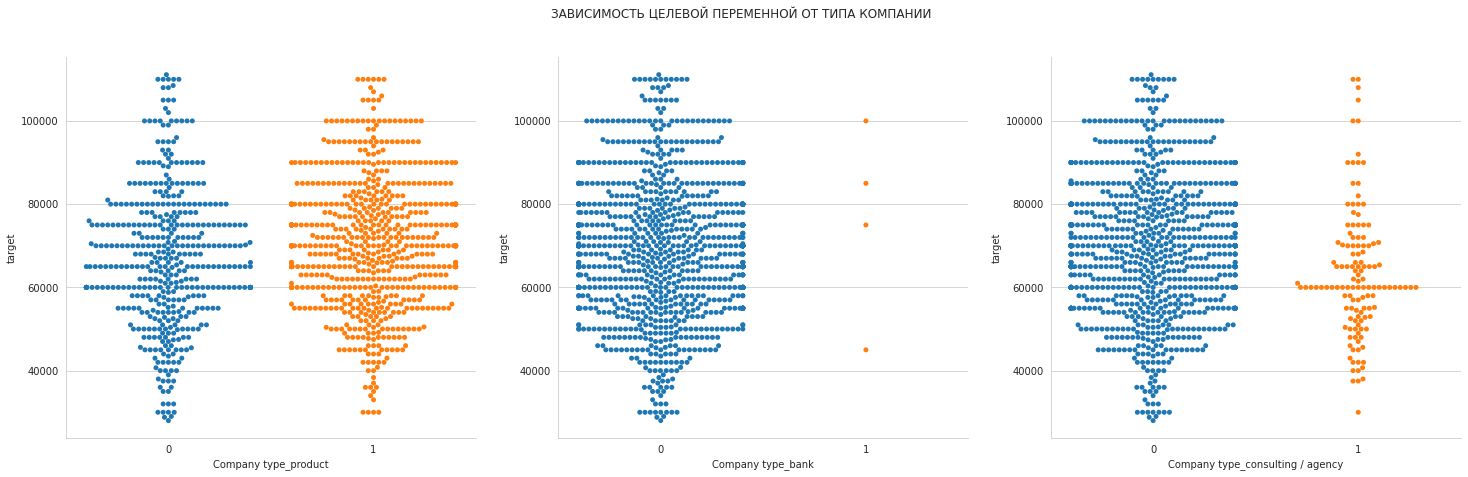

In [226]:
sns.set_style(style='whitegrid')
fig, ax = plt.subplots(1, 3, figsize=(25, 7))
fig.suptitle(str.upper('Зависимость целевой переменной от типа компании'))
sns.swarmplot(x=df_features['Company type_product'], y=df_features[target], ax=ax[0]).set(ylabel='target')
sns.swarmplot(x=df_features['Company type_bank'], y=df_features[target], ax=ax[1]).set(ylabel='target')
sns.swarmplot(x=df_features['Company type_consulting / agency'], y=df_features[target], ax=ax[2]).set(ylabel='target')
sns.despine()

Видно, что тип "bank" малоинформативен, т.к. наблюдений мало. По оставшимся двум можно сказать, что зависимость есть, у "product" широко рассеяны и в основном сосредоточены в среднем диапазоне. У "consulting/agency" в основном сосредоточены в нижней границы среднего диапазона.

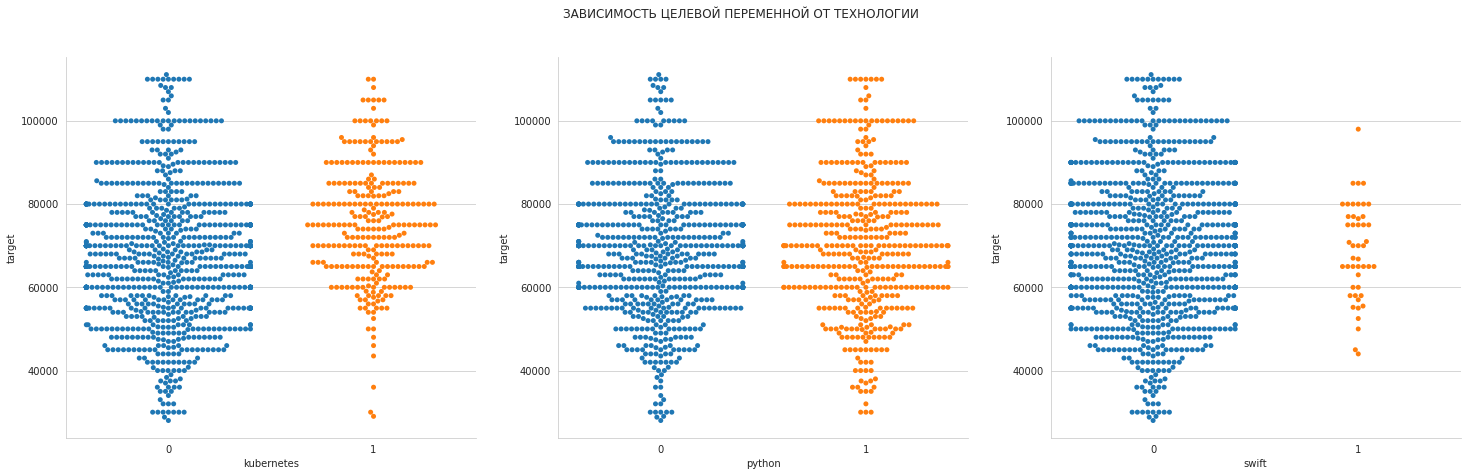

In [227]:
fig, ax = plt.subplots(1, 3, figsize=(25, 7))
fig.suptitle(str.upper('Зависимость целевой переменной от технологии'))
sns.swarmplot(x=df_features['kubernetes'], y=df_features[target], ax=ax[0]).set(ylabel='target')
sns.swarmplot(x=df_features['python'], y=df_features[target], ax=ax[1]).set(ylabel='target')
sns.swarmplot(x=df_features['swift'], y=df_features[target], ax=ax[2]).set(ylabel='target')
sns.despine()

Видно, что у признака "kubernetes" зависимости в основном сосредоточены в районе верхней границы среднго диапазона, "python" - широкое рассеяние и средний диапазон, у "swift" - мало наблюдений и практически все в среднем диапазоне.


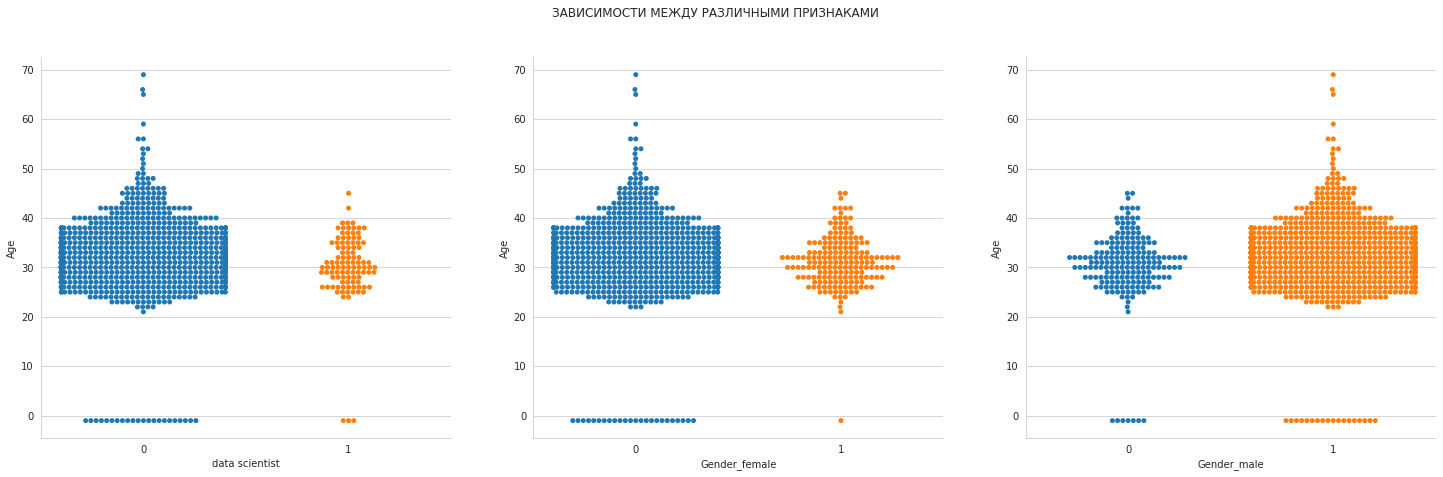

In [228]:
sns.set_style(style='whitegrid')
fig, ax = plt.subplots(1, 3, figsize=(25, 7))
fig.suptitle(str.upper('Зависимости между различными признаками'))
sns.swarmplot(x=df_features['data scientist'], y=df_features['Age'], ax=ax[0])
sns.swarmplot(x=df_features['Gender_female'], y=df_features['Age'], ax=ax[1])
sns.swarmplot(x=df_features['Gender_male'], y=df_features['Age'], ax=ax[2])
sns.despine()

Видим, что у "data scientist" значения расположены очень компактно. По возрастам и полу можно сказать, что у женщин достаточно небольшой диапазон, у мужчин же большая доля и при значении больше 40.

В целом складывается прдеположение, что целевая переменная в большей степени зависит от признаков, обладающих наибольшей акутальностью, например:
- популярные и распространенные в отраслях технологии,
- ИТ-емкие отрасли,
- возраст,
- позиция.

# Дополнительной задание (необязательно)
Здесь Вы можете выдвинуть различные гипотезы относительно данных: опровергнуть их, подтвердить, ну или хотя бы просто перечислить. Построить дополнительные графики, изменить логику преобразования данных (например, метода заполнения пустых значений), и провести любые другие манипуляции с данными, ведь анализ данных - это чистое творчество!